In [1]:
from fullfrlm import flow_refueling_location_model
from generate_network import generate_network
from flow_computation import flow_computation
from random_vessel_generator import random_vessel_generator
from first_stage_frlm import first_stage_frlm
from second_stage_frlm import second_stage_frlm
from create_input_data_abm import create_input_data_abm
from visualize_placement import visualize_placement
import pickle
from determine_additional_nodes import determine_additional_nodes
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import time


There were 25 nodes added, the longest remaining link is now: 34588.667517419424
4 intersections were added
Optimal


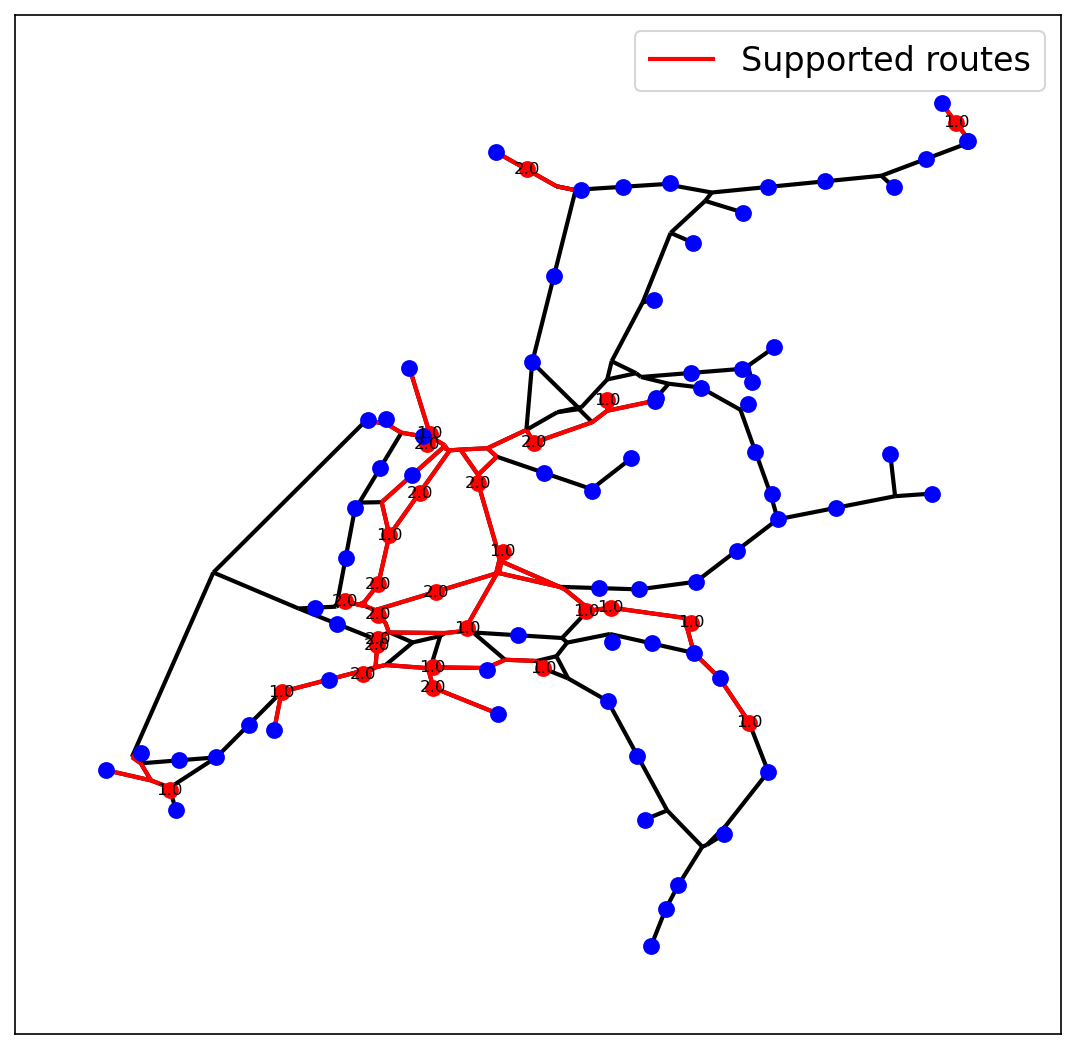

CPU times: total: 32.1 s
Wall time: 34.3 s


In [2]:
%%time
total_flow, fraction_captured_total, serveable_fraction, served_fraction, optimal_facilities, \
                non_zero_flows, routes_supported, paths, G, df_abm, df_random = flow_refueling_location_model(1, 70000, 40, 1000, 2, True, True, True)

In [3]:
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
facilities = [i for i in optimal_facilities.keys() if optimal_facilities[i] > 0]

extra_nodes_used = list(set(facilities)-set(list(df_h.harbour_node)))

In [4]:
extra_nodes_used

['122', '107', '8862801', '104', '113']

In [5]:
fraction_captured_total

0.33084993714131705

In [6]:
serveable_fraction

0.7238355331898559

In [7]:
served_fraction

0.4570788832143971

In [9]:
routes_supported

44.0

In [10]:
non_zero_flows

{('NLABL', 'NLRTM', 0): {'combinations': [['8863306'], ['8866686']],
  'flows': [0.38528386, 0.61471614]},
 ('NLAER', 'NLLEY', 0): {'combinations': [['8864005', '8863709']],
  'flows': [1.0]},
 ('NLAER',
  'NLNIE',
  0): {'combinations': [['8864005', '8863360', '107'],
   ['8864005', '8867538', '107']], 'flows': [0.618794, 0.381206]},
 ('NLAER', 'NLRTM', 0): {'combinations': [['8864005', '8867538', '107']],
  'flows': [0.86249711]},
 ('NLALK', 'NLIJM', 0): {'combinations': [['8866889']], 'flows': [1.0]},
 ('NLAMS', 'NLAER', 0): {'combinations': [['8866763', '8864005']],
  'flows': [1.0]},
 ('NLAMS',
  'NLMOE',
  3): {'combinations': [['8866763',
    '104',
    '8864837',
    '30984595']], 'flows': [1.0]},
 ('NLAMS',
  'NLMOE',
  4): {'combinations': [['8866763',
    '104',
    '8864837',
    '30984595']], 'flows': [1.0]},
 ('NLAMS', 'NLUTC', 1): {'combinations': [['8867240', '8866763']],
  'flows': [1.0]},
 ('NLAMS', 'NLWMO', 0): {'combinations': [['8866889']], 'flows': [1.0]},
 ('NLAM

In [20]:
sum(optimal_facilities.values())

40.0

## Load necessary data

In [2]:
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))

In [3]:
df_ivs

,origin,destination,trip_count,hour,M12,M8,BII-6b,M10,BIIa-1,M9,...,B04,M0,C2l,BII-2L,B02,C1b,C2b,B01,C1l,route_v
0,NLRTM,NLAMS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NLRTM,NLAMS,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NLRTM,NLAMS,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NLRTM,NLAMS,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NLRTM,NLAMS,6,4,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,NLAMS,NLZWI,1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3908,NLAMS,NLZWI,0,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3909,NLAMS,NLZWI,0,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3910,NLAMS,NLZWI,1,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


## Generate random df

In [4]:
%%time
df_chance = df_ivs.copy()
df_random1 = random_vessel_generator(df_chance, 1)

CPU times: total: 3.95 s
Wall time: 4.59 s


In [5]:
df_random1

,origin,destination,trip_count,hour,M12,M8,BII-6b,M10,BIIa-1,M9,...,B04,M0,C2l,BII-2L,B02,C1b,C2b,B01,C1l,route_v
0,NLRTM,NLAMS,168,0,0,113,0,0,0,34,...,0,0,0,0,0,0,0,0,0,1
1,NLRTM,NLAMS,138,0,74,0,0,19,0,0,...,0,0,0,0,0,0,0,0,0,2
2,NLRTM,NLMOE,60,0,0,44,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
3,NLRTM,NLMOE,32,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,NLRTM,NLVLI,83,0,7,34,0,3,0,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,NLHTB,NLBON,1,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2852,NLHTB,NLBON,3,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2853,NLRTM,NLSLU,22,23,0,17,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2854,NLRTM,NLSLU,2,23,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1



## Compute path flows

In [6]:
%%time
flows = flow_computation(df_random1)

CPU times: total: 734 ms
Wall time: 738 ms


In [7]:
sum(flows.values())

1260.560156555773

## Generate network

In [8]:
%%time
G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
paths = pickle.load(open("data/final_paths.p", "rb"))
G, paths, inserted_nodes = generate_network(G, paths, 50000)

There were 47 nodes added, the longest remaining link is now: 24367.051832467885
CPU times: total: 2.03 s
Wall time: 2.08 s


In [9]:
inserted_nodes += determine_additional_nodes(G, df_h, 50000)

9 intersections were added


In [10]:
inserted_nodes

['108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '8862801',
 '8867824',
 '8860563',
 '8860918',
 '8860579',
 '8862851',
 '8864912',
 '8864915',
 '8862419']

In [11]:
%%time
# range r in meters
df_b, df_g, df_eq_fq, feasible_combinations = first_stage_frlm(50000, G, OD=flows, paths=paths, path_lengths=path_lengths, df_h=df_h, additional_nodes=inserted_nodes)

CPU times: total: 23.7 s
Wall time: 23.9 s


## Run second stage FRLM

In [12]:
%%time
optimal_facilities, optimal_flows, non_zero_flows, supported_flow, routes_supported = second_stage_frlm(50000, 15000, 175, 40, 2500, 2, df_g, df_b, df_eq_fq)

Optimal
CPU times: total: 32.7 s
Wall time: 36 s


In [13]:
optimal_facilities

{'108': 0.0,
 '109': 0.0,
 '110': 0.0,
 '111': 0.0,
 '112': 2.0,
 '113': 1.0,
 '114': 0.0,
 '115': 0.0,
 '116': 0.0,
 '119': 0.0,
 '120': 0.0,
 '121': 0.0,
 '122': 1.0,
 '123': 0.0,
 '124': 0.0,
 '125': 0.0,
 '126': 0.0,
 '127': 0.0,
 '128': 0.0,
 '129': 0.0,
 '130': 1.0,
 '131': 0.0,
 '132': 2.0,
 '133': 1.0,
 '134': 0.0,
 '135': 0.0,
 '136': 0.0,
 '137': 1.0,
 '138': 1.0,
 '139': 2.0,
 '140': 2.0,
 '141': 0.0,
 '142': 0.0,
 '143': 0.0,
 '144': 0.0,
 '145': 0.0,
 '146': 0.0,
 '147': 0.0,
 '148': 0.0,
 '149': 0.0,
 '150': 0.0,
 '151': 0.0,
 '152': 0.0,
 '153': 0.0,
 '154': 0.0,
 '155': 0.0,
 '156': 0.0,
 '22637863': 0.0,
 '22638146': 1.0,
 '22638156': 0.0,
 '22638320': 0.0,
 '22638327': 0.0,
 '30984595': 1.0,
 '8860563': 0.0,
 '8860579': 0.0,
 '8860918': 0.0,
 '8861305': 0.0,
 '8861462': 0.0,
 '8861528': 1.0,
 '8861625': 0.0,
 '8861718': 0.0,
 '8862085': 0.0,
 '8862419': 0.0,
 '8862497': 0.0,
 '8862506': 0.0,
 '8862570': 0.0,
 '8862663': 1.0,
 '8862801': 1.0,
 '8862851': 0.0,
 '8863019

In [14]:
sum(optimal_facilities.values())

40.0

In [15]:
sum(optimal_flows.values())

42.461865843000005

In [16]:
supported_flow

530.5585130130619

## Create input data ABM

In [17]:
%%time
df_abm = create_input_data_abm(G, paths, non_zero_flows, optimal_facilities)

CPU times: total: 359 ms
Wall time: 359 ms


In [18]:
df_abm

,id,source,target,length_m,X,Y,name,charging_stations,model_type
0,10000,8863709,8862690,3789.847167,5.525510,52.517546,"(8863709, 8862690)",NaN,link
1,10001,8867785,8862614,4541.701592,3.686130,51.429357,"(8867785, 8862614)",NaN,link
2,10002,8867785,8863891,7937.402030,3.723412,51.393457,"(8867785, 8863891)",NaN,link
3,10003,8867785,119,18962.179854,3.777285,51.424224,"(8867785, 119)",NaN,link
4,10004,8862801,8867083,19982.072045,4.238869,51.580460,"(8862801, 8867083)",NaN,link
...,...,...,...,...,...,...,...,...,...
200,10200,NaN,NaN,NaN,4.168276,51.571819,138,1.0,charging_station
201,10201,NaN,NaN,NaN,5.063732,52.163471,132,2.0,charging_station
202,10202,NaN,NaN,NaN,3.850997,51.428808,119,0.0,inserted_node
203,10203,NaN,NaN,NaN,5.682730,51.881516,130,1.0,charging_station


## Visualize placement

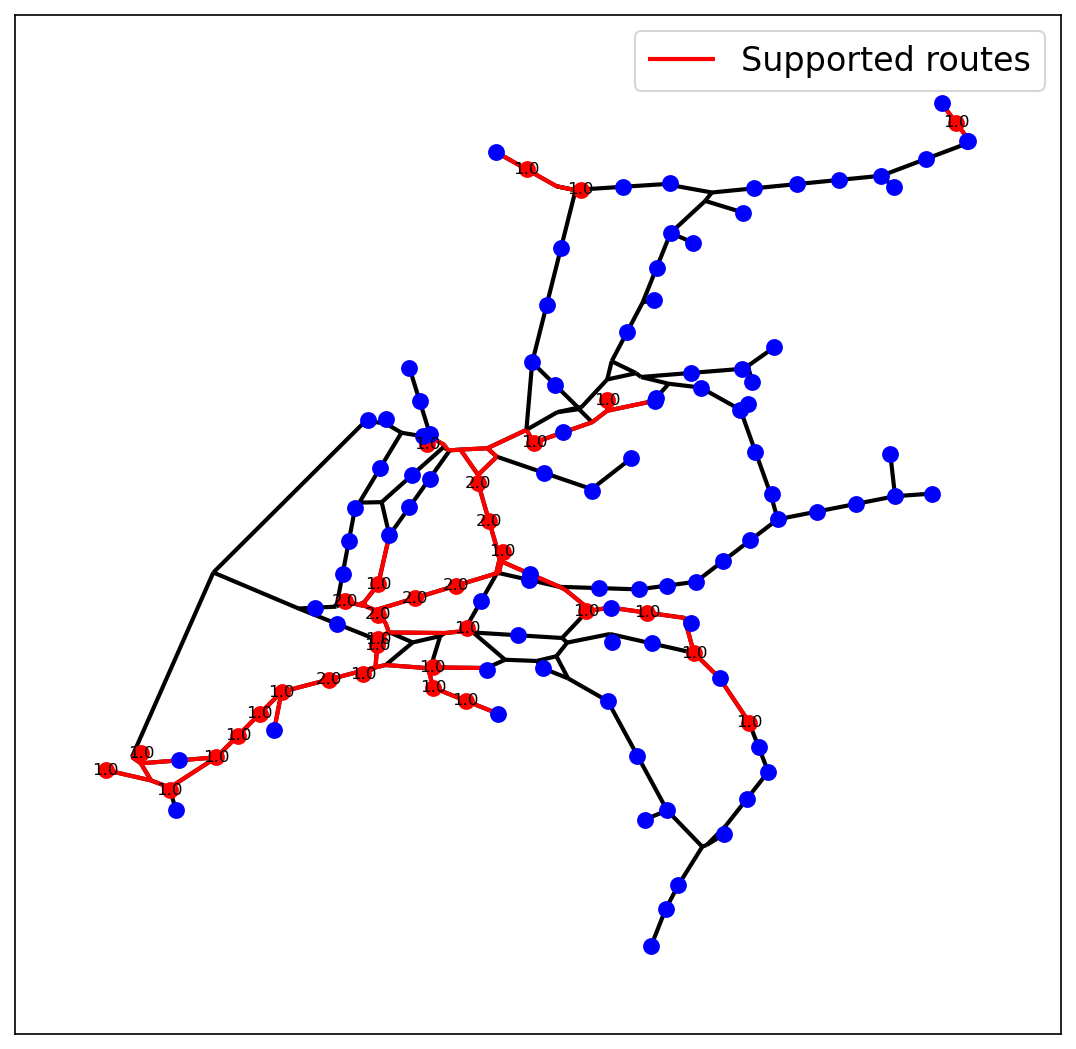

In [19]:
visualize_placement(G,flows, optimal_facilities, non_zero_flows, df_h, paths, True)